<a href="https://colab.research.google.com/github/pavanlost56/Task--Handwritten-character-recognition/blob/main/Handwritten_character_recognition_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Install required libraries
!pip install tensorflow


In [2]:
# Step 2: Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [3]:
# Step 3: Load the MNIST dataset (for handwritten digits, extendable to alphabets)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# Step 4: Data Preprocessing - Normalize the images to values between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [5]:
# Step 5: Build the model - Simple neural network for classification
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images into 1D array
    layers.Dense(128, activation='relu'),  # Fully connected layer with 128 neurons
    layers.Dropout(0.2),  # Dropout to prevent overfitting
    layers.Dense(10, activation='softmax')  # Output layer with 10 classes (digits 0-9)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
# Step 6: Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [7]:
# Step 7: Train the model
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8630 - loss: 0.4747
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9545 - loss: 0.1502
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9661 - loss: 0.1094
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9751 - loss: 0.0821
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9775 - loss: 0.0717


In [8]:
# Step 8: Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 1s - 2ms/step - accuracy: 0.9781 - loss: 0.0742
Test accuracy: 0.9781000018119812


In [9]:
# Step 9: Make predictions on new data
predictions = model.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


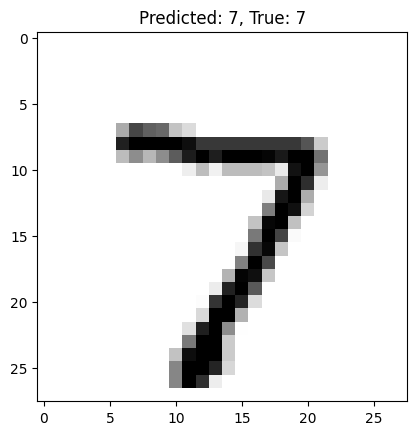

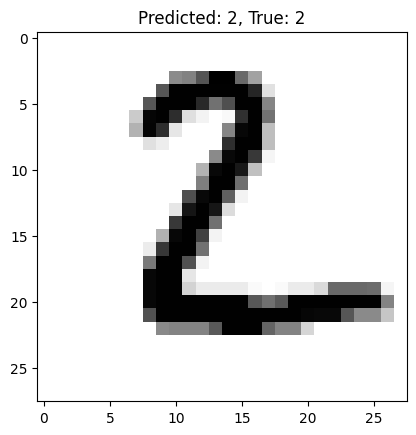

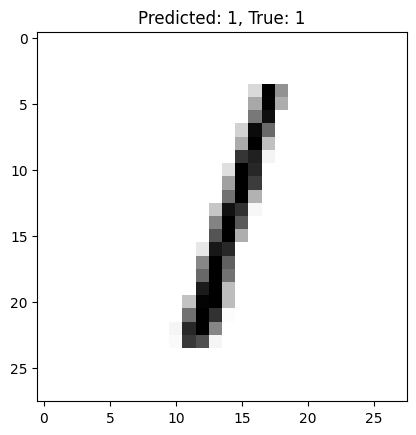

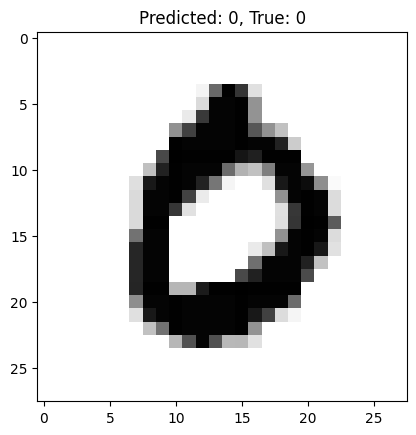

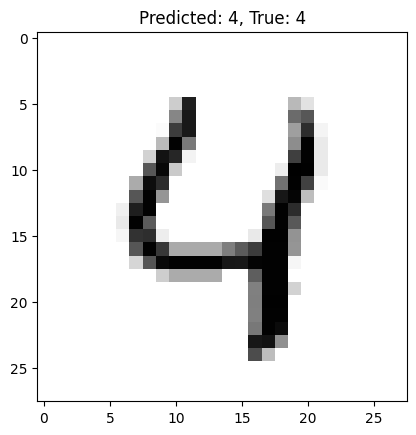

In [10]:
# Step 10: Visualize some predictions
for i in range(5):
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.title(f"Predicted: {predictions[i].argmax()}, True: {y_test[i]}")
    plt.show()